# ML_Group_081_Assignment_1_Set_3_Question-2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
columns_list = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv("car.data", names = columns_list)

In [3]:
replace_map_comp = {}
for col in car_data.columns:
    labels = car_data[col].astype('category').cat.categories.tolist()
    replace_map_comp[col] = {k: v for k,v in zip(labels,list(range(0,len(labels))))}

In [4]:
car_data_numeric = car_data.copy()
car_data_numeric.replace(replace_map_comp, inplace=True)

## Extracting Data as X and Y

In [5]:
X = car_data_numeric.drop('class', axis=1)
Y = car_data_numeric[['class']]

## Data Visualization

### Regression plot and Histogram

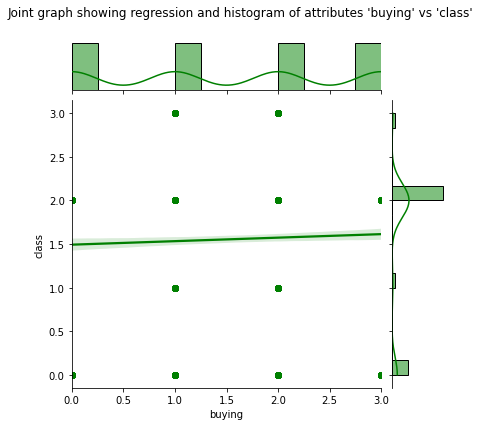

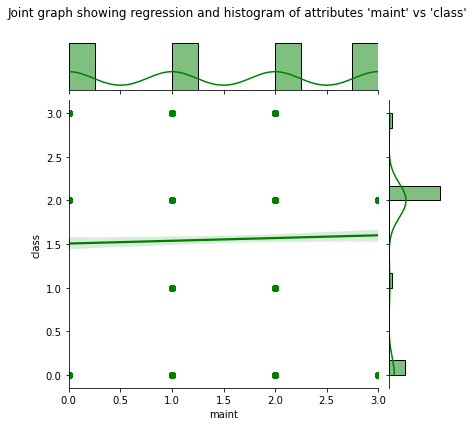

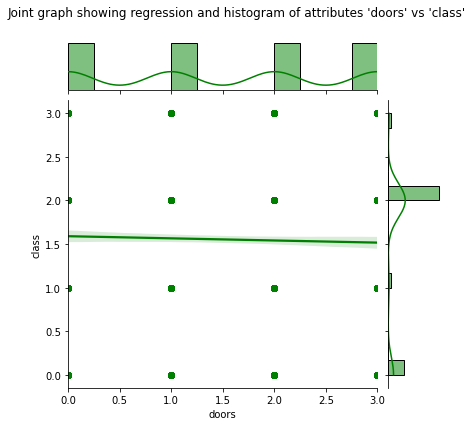

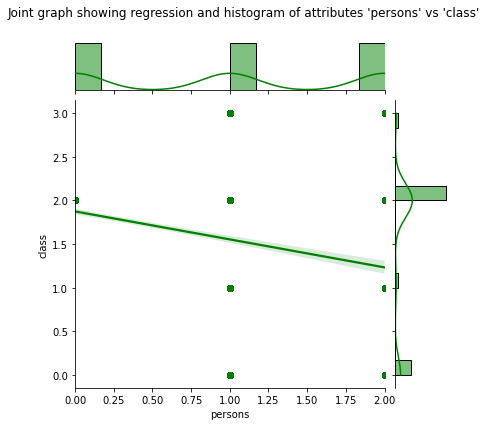

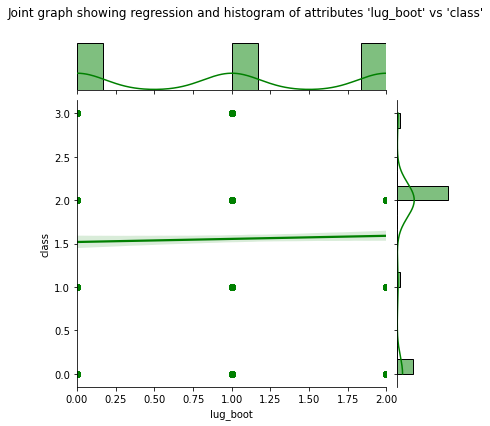

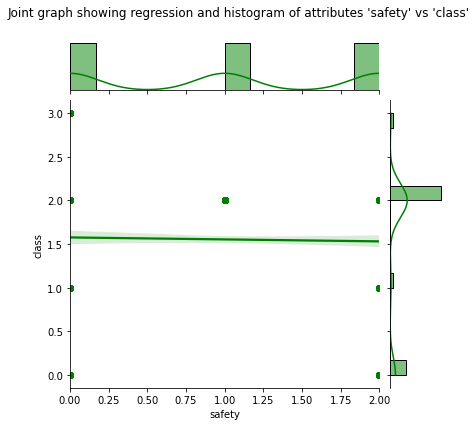

In [6]:
y_axis = 'class'
for x_axis in X.columns:
    sns.jointplot(data=car_data_numeric, x=x_axis, y=y_axis, kind='reg', color='g')
    plt.subplots_adjust(top=0.9)
    graph_title = "Joint graph showing regression and histogram of attributes '{0}' vs 'class'".format(x_axis)
    plt.suptitle(graph_title, fontsize = 12)
    plt.show()
    print('\n\n\n')

### Scatter Plots 

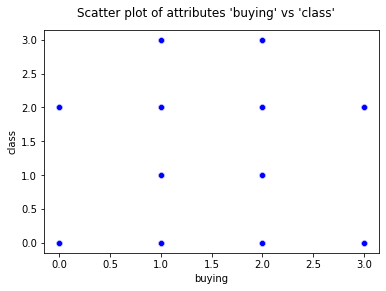

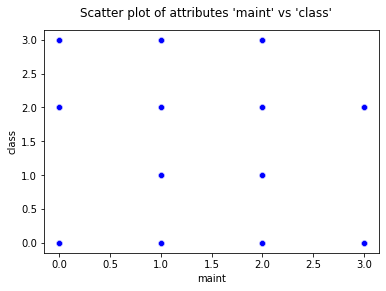

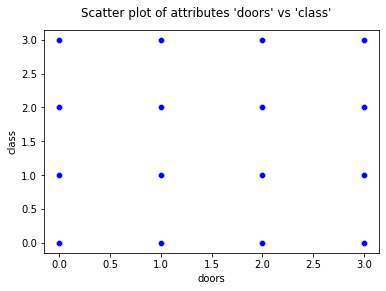

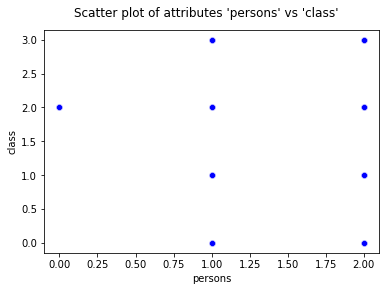

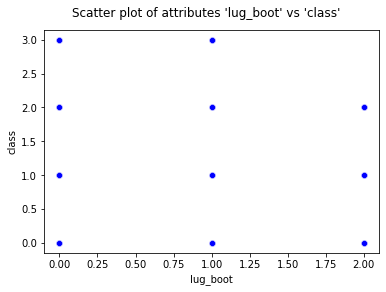

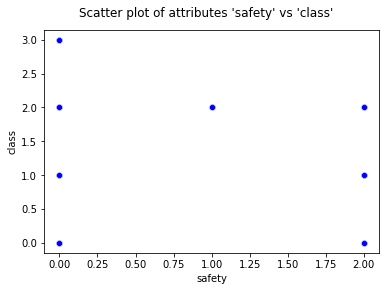

In [7]:
y_axis = 'class'
for x_axis in X.columns:
    sns.scatterplot(data=car_data_numeric, x=x_axis, y=y_axis, color='b')
    plt.subplots_adjust(top=0.9)
    graph_title = "Scatter plot of attributes '{0}' vs 'class'".format(x_axis)
    plt.suptitle(graph_title, fontsize = 12)
    plt.show()
    print('\n\n\n')

## Visualizing the correlation

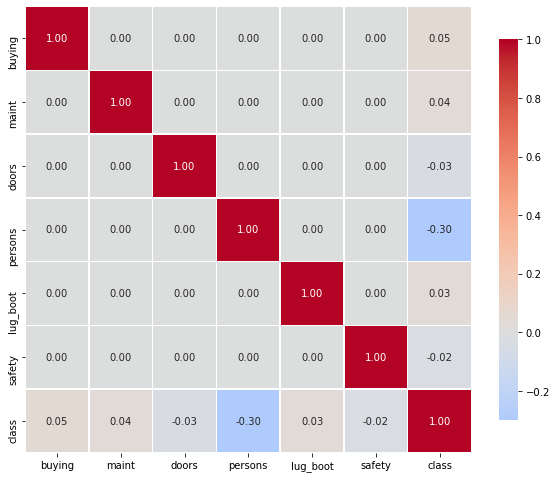

In [8]:
corr = car_data_numeric.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap = 'coolwarm')
plt.show()

## 10-fold cross validation.

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
accuracy_score = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy').mean()

## Train a Logistic regression model for the dataset. 

In [10]:
train_data, test_data = train_test_split(car_data_numeric, test_size = 0.3, random_state = 1)
train_X = train_data.drop('class', axis=1)
train_Y = train_data[['class']]
test_X = test_data.drop('class', axis=1)
test_Y = test_data[['class']]
logreg = LogisticRegression()
logreg.fit(train_X, train_Y)

LogisticRegression()

## Accuracy 

In [11]:
print ('accuracy : ', accuracy_score.round(decimals = 4) )

accuracy :  0.6574


## Confusion Matrix

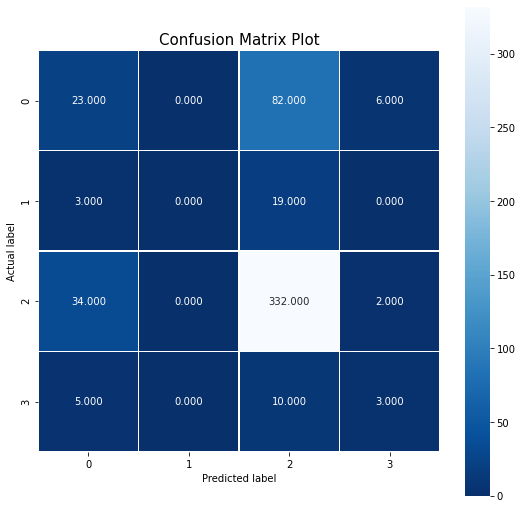

In [12]:
## Confusion Matrix Plot
cm = confusion_matrix(test_Y, logreg.predict(test_X))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Plot', size = 15)
plt.show()

## Predicting the class lable for given car attributes

In [13]:
test_df = pd.DataFrame([{"buying":"vhigh", "maint":"low", "doors":'4', "persons":"more", "lug_boot":"small", "safety":"med"}])
test_df_numeric = test_df.copy()
test_df_numeric.replace(replace_map_comp,inplace=True)
y_pred=logreg.predict(test_df_numeric)
class_lable_dict = replace_map_comp['class']
pred_class_lable = list(class_lable_dict.keys())[list(class_lable_dict.values()).index(y_pred[0])]
print ('Predicted class label of a car with given attributes - buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]\n\nPredicted class label : "{0}"'.format(pred_class_lable))

Predicted class label of a car with given attributes - buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]

Predicted class label : "unacc"
